<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/K_Fold_CV_on_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataSet = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataSet

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
# Problem Statemen is to predict whether the asset is purchased or not

In [ ]:
x = dataSet.iloc[:,:-1].values
y = dataSet.iloc[:, -1].values
x

#Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 7)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train)

#Fitting the model on our data set

In [9]:
from sklearn.svm import SVC
# we will be linear kernel as of now
svmModel = SVC(kernel = 'rbf', random_state=777)

In [10]:
svmModel.fit(x_train, y_train)

SVC(random_state=777)

In [11]:
svmModel.score(x_train, y_train)
# hence we get around 83% training accuracy for linear kernel
# hence we get around 90% training accuracy for non linear kernel

0.903125

In [12]:
svmModel.score(x_test, y_test)
# hence we get around 89% testing accuracy for linear kernel
# hence we get around 92% testing accuracy for non linear kernel

0.925

#Predicting on test data set

In [17]:
y_pred = svmModel.predict(x_test)

In [18]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [19]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [20]:
from sklearn.metrics import jaccard_score
# Jaccard score is the ratio of intersection of actual and predicted outputs to union of actual and predicted outputs
jaccard_score(y_test, y_pred,pos_label=0)

0.8928571428571429

In [ ]:
# to compare the predicted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion Matrix

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  4]
 [ 2 24]]


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.925

In [24]:
# we get accuracy of almost 93% 

In [25]:
import seaborn as sns

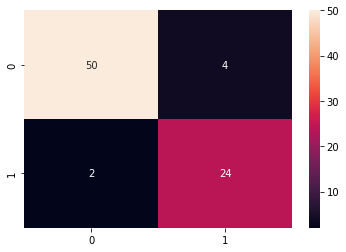

In [26]:
sns.heatmap(cm, annot=True)

#K-fold Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svmModel, X = x_train, y = y_train, cv = 10)
print(accuracies)

[0.88 0.88 0.91 0.97 0.91 0.94 0.91 0.84 0.97 0.91]


In [34]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Variation : {:.2f} %".format(accuracies.std()*100))
print("Range of accuracies of k folds mentioned fall in the range : {:.2f}% to {:.2f}%".format((accuracies.mean()-accuracies.std())*100,(accuracies.mean()+accuracies.std())*100))

Accuracy : 90.94 %
Standard Variation : 3.81 %
Range of accuracies of k folds mentioned fall in the range : 87.12% to 94.75%


#Visualisation of training dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


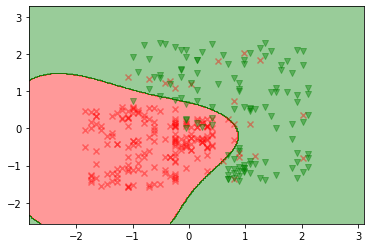

In [ ]:
from matplotlib.colors import ListedColormap

markers = ('x', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_train))])

    # plot the decision surface
x1_min, x1_max = x_train[:, 0].min() - 1,  x_train[:, 0].max() + 1    
x2_min, x2_max =  x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z = svmModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=x_train[y_train == cl, 0], y=x_train[y_train == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)

#Visualisation of testing dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


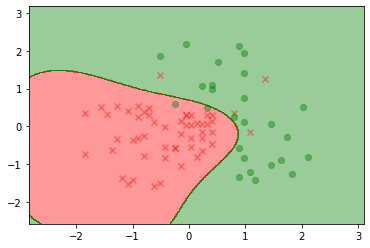

In [ ]:
from matplotlib.colors import ListedColormap

markers = ('x', 'o', '^', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
x1_min, x1_max = x_test[:, 0].min() - 1,  x_test[:, 0].max() + 1    
x2_min, x2_max =  x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z =svmModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test[y_test == cl, 0], y=x_test[y_test == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)